In [1]:
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pandas as pd
import numpy as np
import matplotlib.dates as dates
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline
import re
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import IPython
from IPython.core.display import HTML
from IPython.display import Image
import IPython.core.display as di
import matplotlib.cm as cm

import matplotlib.patches as mpatches

In [3]:
def parse_datetime(x):
    return datetime.strptime(x[1:-3], '%d/%b/%Y:%H:%M')

def parsedatetime(x):
    return datetime.strptime(x[:-3], '%Y-%m-%d %H:%M')

def parsedatetime2(x):
    return datetime.strptime(x[:-3], '%d/%m/%Y %H:%M')

def convToInt(val):
    try:
        result = re.sub('\W', '' , val)
        result = re.sub('\D', '' , result)
        return int(result)
    except:
        return 0
    
def convToFloat(val):
    try:
        result = re.sub('\W', '' , val)
        result = re.sub('\D', '' , result)
        return float(result)
    except:
        return 0
    

def convToSegundo(val):
    print(val)
    result = re.sub('\W', '' , val)
    val = int(result)
    
    return val/1000000

def percentile(n):
    def _percentile(x):
        return np.percentile(x, n)
    _percentile.__name__ = '{}-th percentile'.format(n)
    return _percentile

In [90]:
dadosAccesslog = pd.read_csv('2511sl.log',
                   sep='\s+',
                   engine='python', 
                   na_values='-', 
                   header=None ,
                   usecols=[0, 3, 5, 6, 7, 8, 9],
                   names=['host', 'date_time', 'Metodo', 'csuri' ,'status', 'bytes', 'timetaken'],
                   converters={'date_time': parse_datetime,
                              'status': convToInt,
                              'bytes': convToInt,
                              'timetaken': convToInt
                              }
                   )
dadosAccesslog = dadosAccesslog.set_index('date_time')
dadosAccesslog.head()

,host,Metodo,csuri,status,bytes,timetaken
date_time,,,,,,
2021-02-04 16:09:00,189.112.150.98,"""GET",/e4db09bd4a95c688171f6029c2504aabbd51c93ac155f...,200,992,0
2021-02-04 16:09:00,10.59.59.30,"""GET",/7b8cbe2e6617b607117c8c5bfc63ebe1fad15b525631f...,200,29366,0
2021-02-04 16:09:00,10.59.59.30,"""GET",/7b8cbe2e6617b607117c8c5bfc63ebe1fad15b525631f...,200,2642,0
2021-02-04 16:09:00,10.59.59.30,"""GET",/7b8cbe2e6617b607117c8c5bfc63ebe1fad15b525631f...,200,3000,0
2021-02-04 16:09:00,191.7.72.141,"""GET",/e05628257f9fbba405729c8276ce15435d0e7e478ef8c...,200,150,5


In [91]:
df_alvo = dadosAccesslog.loc[(dadosAccesslog['csuri'].str.contains('/econtrato') == True)
                            & (dadosAccesslog['Metodo'].str.contains('POST') == True)
                            & (dadosAccesslog['status'] < 400)]
df_alvo['bytes'].fillna(0, inplace=True)
grAlvo = df_alvo.groupby(['date_time','host', 'csuri']).agg({    
        'timetaken': ['max', 'mean', percentile(90.)],
        'csuri':['count'],
        'bytes':['mean']
    })
grAlvo.columns = ['max timetaken', 'mean timetaken', 'Perc90 timetaken', 'Qtd Request', 'Bytes mean']
grAlvo =  grAlvo.sort_values(by=['max timetaken'],ascending=False)
grAlvo.to_csv ('2511sl.csv', index = True, header=False)
grAlvo.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,,,max timetaken,mean timetaken,Perc90 timetaken,Qtd Request,Bytes mean
date_time,host,csuri,,,,,
2021-02-09 19:15:00,10.240.3.151,/econtrato,40,7.333333,16.8,9,600.333333
2021-02-09 15:20:00,10.240.3.151,/econtrato,40,16.625000,27.4,8,590.750000
2021-02-09 12:55:00,10.240.3.153,/econtrato,39,3.545455,0.0,11,627.272727
2021-02-09 13:42:00,10.240.3.151,/econtrato,38,9.800000,21.8,10,608.100000
2021-02-09 17:32:00,10.240.3.151,/econtrato,38,6.636364,20.0,11,601.818182


In [92]:
dfcompilado = pd.read_csv('accesslogcompilado.log',
                   sep=',',
                   engine='python', 
                   na_values='-', 
                   header=None ,
                   names=['date_time', 'host', 'Request', 'max' ,'mean', 'Per90', 'Qtd Request', 'Mean Bytes'],
                   converters={'date_time': parsedatetime,
                              ('max', 'mean', 'Per90', 'Qtd Request', 'Mean Bytes'): convToFloat
                              }
                   )
dfcompilado = dfcompilado.set_index('date_time')
dfcompilado.head(10)

,host,Request,max,mean,Per90,Qtd Request,Mean Bytes
date_time,,,,,,,
2021-02-10 11:12:00,10.240.3.158,/econtrato,25,6.000000,13.0,13,606.307692
2021-02-10 10:20:00,10.240.3.158,/econtrato,24,6.500000,18.0,6,608.000000
2021-02-10 10:07:00,10.240.3.158,/econtrato,23,3.600000,12.2,10,612.700000
2021-02-10 09:36:00,10.240.3.158,/econtrato,23,7.400000,18.6,5,594.200000
2021-02-10 10:12:00,10.240.3.158,/econtrato,23,3.562500,11.5,16,614.000000
2021-02-10 11:46:00,10.240.3.158,/econtrato,23,6.636364,17.0,11,605.909091
2021-02-10 09:32:00,10.240.3.158,/econtrato,22,4.333333,12.0,6,600.500000
2021-02-10 09:31:00,10.240.3.158,/econtrato,17,5.000000,14.0,6,600.333333
2021-02-10 10:25:00,10.240.3.158,/econtrato,16,2.000000,2.0,13,606.538462


In [112]:
gp_Requets = dfcompilado.groupby(['Request']).agg({    
    'mean':['mean'],
    'Per90': [percentile(90.)],
    'Qtd Request':['sum']
})

gp_Requets.head()

,mean,Per90,Qtd Request
,mean,90.0-th percentile,sum
Request,,,
/econtrato,8.814942,30.0,263860
/econtrato/,3.497935,2.0,17067


In [93]:
df_alvo = dadosAccesslog.loc[(dadosAccesslog['csuri'].str.contains('/econtrato') == True)
                            & (dadosAccesslog['Metodo'].str.contains('POST') == True)]

df_alvo['bytes'].fillna(0, inplace=True)
df_alvo.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,host,Metodo,csuri,status,bytes,timetaken
date_time,,,,,,
2021-02-04 16:09:00,10.240.3.160,"""POST",/econtrato,200,631,0
2021-02-04 16:09:00,10.240.3.160,"""POST",/econtrato,200,632,1
2021-02-04 16:09:00,10.238.35.207,"""POST",/econtrato/,200,503,4
2021-02-04 16:09:00,10.240.3.160,"""POST",/econtrato,200,632,1
2021-02-04 16:09:00,10.240.3.160,"""POST",/econtrato,200,585,2
2021-02-04 16:09:00,10.238.35.207,"""POST",/econtrato/,200,503,1
2021-02-04 16:09:00,10.240.3.160,"""POST",/econtrato,200,631,0
2021-02-04 16:09:00,10.240.3.160,"""POST",/econtrato,200,631,0
2021-02-04 16:09:00,10.238.35.207,"""POST",/econtrato/,200,503,2


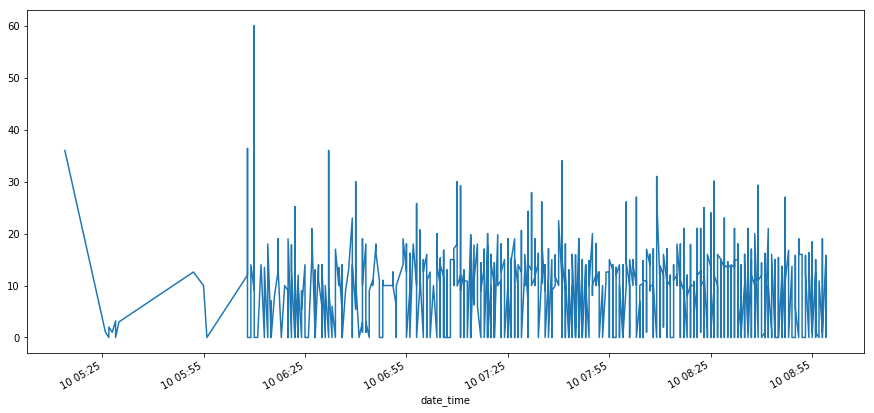

In [95]:
dfcompilado['2021-02-10 05': '2021-02-10 08']['Per90'].plot(figsize=(15, 7))

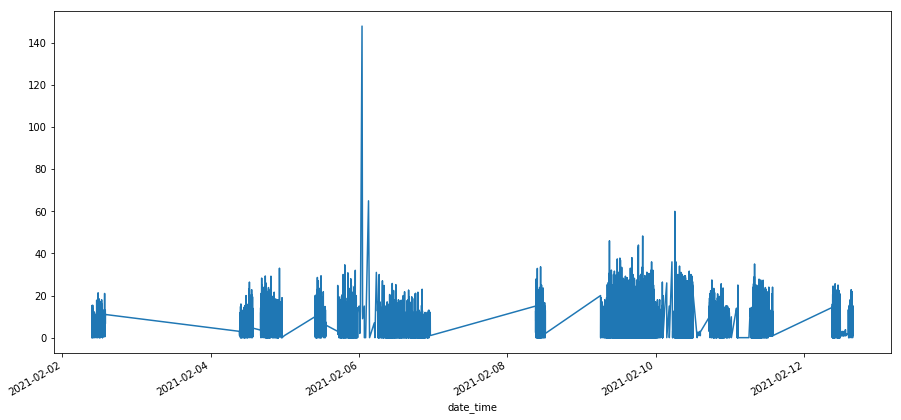

In [98]:
dfcompilado =  dfcompilado.sort_index()

#dfcompilado['2021-02-10 09': '2021-02-10 21']['Per90'].plot(figsize=(15, 7))
dfcompilado['Per90'].plot(figsize=(15, 7))

In [96]:
gp_host = dfcompilado.groupby(['host']).agg({    
    'max': ['max'],
    'mean':['mean'],
    'Per90': [percentile(90.)],
    'Qtd Request':['sum']
})
gp_host.columns = ['max Tempo Resposta (s)', 'mean Tempo Resposta (s)', 'Perc90 Tempo Resposta (s)', 'Qtd Request']
gp_host =  gp_host.sort_values(by=['Perc90 Tempo Resposta (s)', 'Qtd Request'],ascending=False)
gp_host

,max Tempo Resposta (s),mean Tempo Resposta (s),Perc90 Tempo Resposta (s),Qtd Request
host,,,,
191.217.208.206,44,43.500000,43.90,2
10.240.3.148,51,4.304001,18.50,11752
10.240.3.155,52,4.288453,18.30,13614
10.240.3.161,49,4.577814,18.20,11671
10.240.3.153,60,4.817298,18.00,9983
10.240.3.223,47,4.740013,17.40,9780
10.240.3.151,40,4.380999,17.00,10289
10.240.3.154,44,4.699490,17.00,9699
10.240.3.221,36,4.326678,16.40,7081


,max timetaken,mean timetaken,Perc90 timetaken,Qtd Request,Bytes mean
host,,,,,
10.240.3.150,27,8.800000,20.6,5,603.400000
10.240.3.160,40,3.956258,16.0,1486,611.764468
10.240.3.157,41,3.864215,16.0,1414,613.351485
10.240.3.220,45,3.754425,16.0,1356,613.286873
10.240.3.223,20,6.000000,15.0,6,608.000000
10.240.3.159,17,5.666667,13.6,3,615.666667
10.240.3.147,46,2.791878,12.0,7904,614.265562
10.240.3.151,26,2.261718,12.0,4203,615.415180
10.240.3.152,26,2.381662,12.0,3959,614.710280


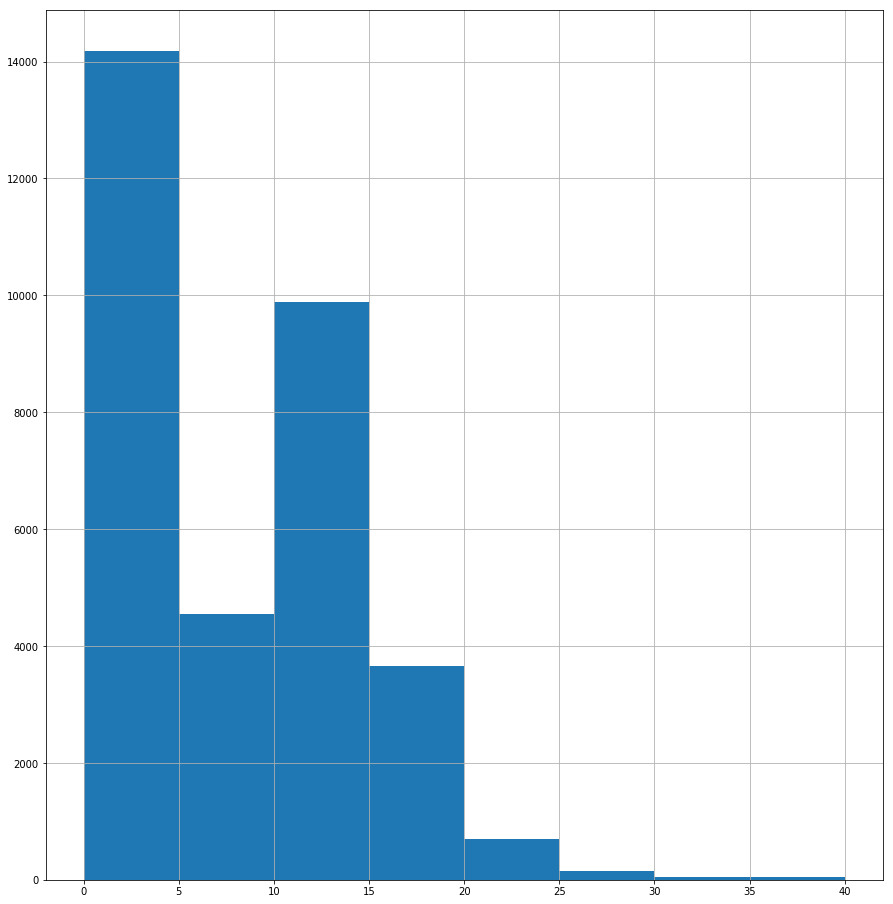

In [100]:
#gp_histograma = dfcompilado.groupby(['Per90']).agg({    
#    'Qtd Request':['sum']
#})

#gp_histograma.columns = ['Qtd Request']
#gp_histograma = gp_histograma.reset_index()

dfcompilado['Per90'].hist(bins=[0,5,10,15,20,25,30,40], figsize=(15, 16))

In [97]:
plt.hist(x, bins=[0,10,20,30,40,50,60,70,80,90,99])
plt.show()


gp_histograma.hist()

NameError: name 'x' is not defined

NameError: name 'pd' is not defined

In [67]:
dfFiltro = dadoswaitevents['2021-02-09 15:15': '2021-02-09 15:30']
dfFiltro.head()

,INSTANCE,EVENT,WAIT_CLASS,MIN_WAIT,AVG_WAIT,P90_WAIT,P95_WAIT,P99_WAIT,MAX_WAIT
WAIT_DATE,,,,,,,,,
2021-02-09 15:20:00,1,CPU,CPU,8559.49,8559.49,8559.49,8559.49,8559.49,8559.49
2021-02-09 15:20:00,1,LGWR any worker group,Other,8.30,8.30,8.30,8.30,8.30,8.30
2021-02-09 15:20:00,1,db file parallel read,User I/O,89.97,89.97,89.97,89.97,89.97,89.97
2021-02-09 15:20:00,1,db file parallel write,System I/O,11.04,11.04,11.04,11.04,11.04,11.04
2021-02-09 15:20:00,1,db file scattered read,User I/O,66.27,66.27,66.27,66.27,66.27,66.27


In [68]:
dfFiltro = dfFiltro.loc[(dfFiltro['INSTANCE'] == 3)]

gpeventstop = dfFiltro.groupby(['EVENT']).agg({    
    'MIN_WAIT': [percentile(90.)]
})
gpeventstop.columns = ['MIN_WAIT']
gpeventstop =  gpeventstop.sort_values(by=['MIN_WAIT'],ascending=False)
gpeventstop = gpeventstop.reset_index()
gpeventstop.head()

,EVENT,MIN_WAIT
0,CPU,8678.976
1,db file sequential read,490.621
2,direct path read temp,130.590
3,log file sync,72.059
4,db file scattered read,71.273


In [69]:
gpevents = dfFiltro.groupby(['WAIT_DATE', 'EVENT']).agg({    
    'P90_WAIT': [percentile(90.)]
})
gpevents = gpevents.reset_index()
gpevents = gpevents.set_index('WAIT_DATE')
gpevents.columns = ['EVENT','P90_WAIT']
gpevents = gpevents.loc[(gpevents['EVENT'].isin(gpeventstop['EVENT'].head()))]
gpevents = gpevents.reset_index()

gpevents = pd.pivot_table(gpevents, 
                              index='WAIT_DATE', 
                              columns = 'EVENT' , 
                              values='P90_WAIT', 
                              aggfunc={'P90_WAIT': [percentile(90.)]})
gpevents.head()
gpevents = gpevents.reset_index()
gpevents.columns = ['WAIT_DATE','CPU','RMAN backup & recovery I/O','db file sequential read', 'direct path read temp', 'read by other session' ]
gpevents = gpevents.set_index('WAIT_DATE')
gpevents['CPU'].fillna(0, inplace=True)
gpevents['RMAN backup & recovery I/O'].fillna(0, inplace=True)
gpevents['db file sequential read'].fillna(0, inplace=True)
gpevents['direct path read temp'].fillna(0, inplace=True)
gpevents['read by other session'].fillna(0, inplace=True)
#gpevents.plot.stackplot()

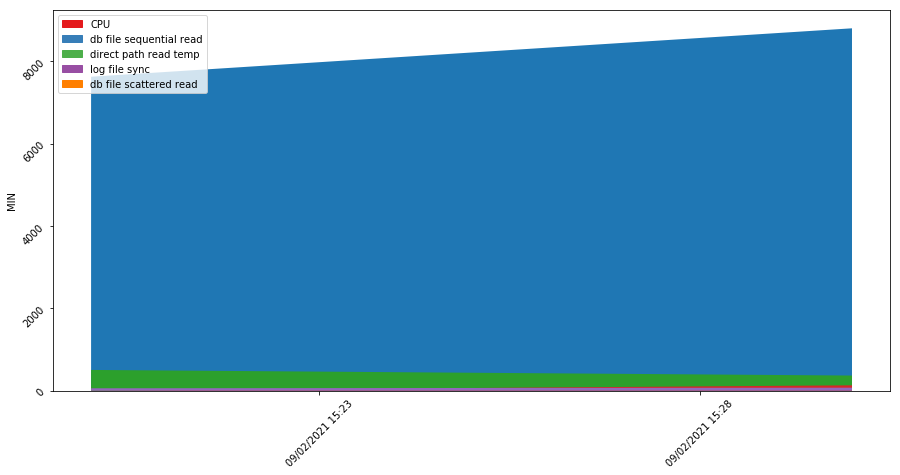

In [70]:
fig, ax1 = plt.subplots(figsize=(15, 7))

lthandles=[]
for col in gpevents.columns:
    grfc1 = ax1.stackplot(gpevents.index, gpevents[col], cmap='Set1')
    ax1.set_ylabel('MIN')
    ax1.xaxis.set_major_formatter(dates.DateFormatter('%d/%m/%Y %H:%M'))
    ax1.tick_params(labelrotation=45)
    #ax1.xaxis.set_major_locator(dates.MinuteLocator(byminute=None, interval=3))
  


    
def buildhandles():
    global lthandles
    cmap = cm.get_cmap('Set1')
    colors = cmap(gpeventstop.head().index.values)
    for x in list(range(0,  len(gpeventstop['EVENT'].head()) )): #datasetLegenda.index.values:
        red_patch = mpatches.Patch(color=colors[x], label=gpeventstop['EVENT'].head().values[x][:40])
        lthandles.append(red_patch)
    
buildhandles()   
ax1.legend(handles=lthandles, loc='upper left')
#ax1.grid(True)    


In [64]:
dadosiowaitevents = pd.read_csv('io_latency.csv',
                   sep=';',
                   engine='python', 
                   na_values='-', 
                   header=1,
                   #usecols=[0, 3, 5, 6, 7, 8, 9],
                   names=['IOLATENCY_DATE','INSTANCE','EVENT','MIN_MS','AVG_MS','P90_MS','P95_MS','P99_MS','MAX_MS','THRESHOLD'],
                   converters={'IOLATENCY_DATE': parsedatetime2,
                              ('MIN_MS','AVG_MS','P90_MS','P95_MS','P99_MS','MAX_MS','THRESHOLD'): convToFloat
                              }
                   )
dadosiowaitevents = dadosiowaitevents.set_index('IOLATENCY_DATE')
def calperc(valor, total):
    result = (valor / total) * 100
    return result

dadosiowaitevents['PercLIMIT'] = [calperc(valor, total) for valor, total in dadosiowaitevents[['P90_MS', 'THRESHOLD']].values]
dadosiowaitevents.head()

,INSTANCE,EVENT,MIN_MS,AVG_MS,P90_MS,P95_MS,P99_MS,MAX_MS,THRESHOLD,PercLIMIT
IOLATENCY_DATE,,,,,,,,,,
2021-01-20,1,db file sequential read,0.75,0.75,0.75,0.75,0.75,0.75,20.0,3.75
2021-01-20,1,direct path read,6.31,6.31,6.31,6.31,6.31,6.31,20.0,31.55
2021-01-20,1,direct path read temp,6.76,6.76,6.76,6.76,6.76,6.76,20.0,33.80
2021-01-20,1,direct path write,1.07,1.07,1.07,1.07,1.07,1.07,20.0,5.35
2021-01-20,1,direct path write temp,0.94,0.94,0.94,0.94,0.94,0.94,20.0,4.70


In [72]:
dfioFiltro = dadosiowaitevents['2021-02-09 15:15': '2021-02-09 15:30']
dfioFiltro = dfioFiltro.loc[(dfioFiltro['INSTANCE'] == 3)]
dfioFiltro.tail()

,INSTANCE,EVENT,MIN_MS,AVG_MS,P90_MS,P95_MS,P99_MS,MAX_MS,THRESHOLD,PercLIMIT
IOLATENCY_DATE,,,,,,,,,,
2021-02-09 15:30:00,3,direct path read,1.07,1.07,1.07,1.07,1.07,1.07,20.0,5.35
2021-02-09 15:30:00,3,direct path read temp,10.28,10.28,10.28,10.28,10.28,10.28,20.0,51.40
2021-02-09 15:30:00,3,direct path write,0.81,0.81,0.81,0.81,0.81,0.81,20.0,4.05
2021-02-09 15:30:00,3,direct path write temp,0.82,0.82,0.82,0.82,0.82,0.82,20.0,4.10
2021-02-09 15:30:00,3,log file parallel write,0.90,0.90,0.90,0.90,0.90,0.90,20.0,4.50


In [73]:
gpioeventstop = dfioFiltro.groupby(['EVENT']).agg({    
    'P90_MS': [percentile(90.)],
    'PercLIMIT': [percentile(90.)]
})
gpioeventstop.columns = ['P90_MS', 'PercLIMIT']
gpioeventstop =  gpioeventstop.sort_values(by=['PercLIMIT'],ascending=False)
gpioeventstop = gpioeventstop.reset_index()
gpioeventstop.head(5)

,EVENT,P90_MS,PercLIMIT
0,direct path read temp,9.511,47.555
1,db file sequential read,2.019,10.095
2,db file scattered read,1.850,9.250
3,direct path read,1.205,6.025
4,log file parallel write,0.936,4.680


In [85]:
dadosqueriesevents = pd.read_csv('top_queries_by_event.csv',
                   sep=';',
                   engine='python', 
                   na_values='-', 
                   header=1,
                   #usecols=[0, 3, 5, 6, 7, 8, 9],
                   names=['PERC','INSTANCE','EVENT','MODULE','SCHEMA','SQL_ID','BG','BG_BY_EXEC','DR','DR_BY_EXEC','CPU','CPU_BY_EXEC','ELAP','ELAP_BY_EXEC','PARSE','EXEC','SQL_TEXT_SHORT'],
                   converters={
                              ('PERC','CPU','CPU_BY_EXEC','ELAP','ELAP_BY_EXEC','PARSE','EXEC'): convToFloat
                              }
                   )
dadosqueriesevents = dadosqueriesevents.set_index('INSTANCE')

dfFiltroqrevents = dadosqueriesevents.loc[(dadosqueriesevents.index == 3)
                                         & (dadosqueriesevents['MODULE'].str.contains('brtlvlts2511sl') == True )]
dfFiltroqrevents =  dfFiltroqrevents.sort_values(by=['PERC'],ascending=False)


In [83]:
dfFiltroqrevents = dfFiltroqrevents.loc[(dfFiltroqrevents['EVENT'].str.contains('direct path read temp') == True )]
dfFiltroqrevents.head()

,PERC,EVENT,MODULE,SCHEMA,SQL_ID,BG,BG_BY_EXEC,DR,DR_BY_EXEC,CPU,CPU_BY_EXEC,ELAP,ELAP_BY_EXEC,PARSE,EXEC,SQL_TEXT_SHORT
INSTANCE,,,,,,,,,,,,,,,,
3,2.39,direct path read temp,httpd@brtlvlts2511sl (TNS V1-V3),GEDOCCN,2981h88q59qgh,9457756237.00,3546215.31,344170366.0,129047.76,65646.69,24.61,177811.17,66.67,2667.0,2667.0,"SELECT tab.* , gedocow.pkg_base"
3,1.54,direct path read temp,httpd@brtlvlts2511sl (TNS V1-V3),GEDOCCN,5qvj3bw54gcg9,7209867873.00,8393326.98,427095187.0,497200.45,41962.12,48.85,161999.02,188.59,859.0,859.0,"SELECT tab.* , gedocow.pkg_base"
3,1.42,direct path read temp,httpd@brtlvlts2511sl (TNS V1-V3),GEDOCCN,b21tpfwzvx4jf,11056322807.00,13837700.63,637752112.0,798187.87,60150.88,75.28,205837.06,257.62,799.0,799.0,"SELECT tab.* , gedocow.pkg_base"
3,0.91,direct path read temp,httpd@brtlvlts2511sl (TNS V1-V3),GEDOCCN,chu7x92vfry1h,13340247065.00,31762493.01,311855298.0,742512.61,36364.79,86.58,112538.64,267.95,420.0,420.0,"SELECT tab.* , gedocow.pkg_base"
3,0.45,direct path read temp,httpd@brtlvlts2511sl (TNS V1-V3),GEDOCCN,bjq9uv263d1m9,318545531.00,2769961.14,66055575.0,574396.30,5528.98,48.08,20078.73,174.60,115.0,115.0,"SELECT tab.* , gedocow.pkg_base"


In [86]:
dfFiltroqrevents = dfFiltroqrevents.loc[(dfFiltroqrevents['EVENT'].str.contains('db file sequential read') == True )]
dfFiltroqrevents.head()

,PERC,EVENT,MODULE,SCHEMA,SQL_ID,BG,BG_BY_EXEC,DR,DR_BY_EXEC,CPU,CPU_BY_EXEC,ELAP,ELAP_BY_EXEC,PARSE,EXEC,SQL_TEXT_SHORT
INSTANCE,,,,,,,,,,,,,,,,
3,0.74,db file sequential read,httpd@brtlvlts2511sl (TNS V1-V3),GEDOCCN,ftza2a5naa1vd,70855432.00,121744.73,54526685.0,93688.46,2219.31,3.81,130398.88,224.05,582.0,582.0,"SELECT COUNT(:""SYS_B_0"") as Tot"
3,0.36,db file sequential read,httpd@brtlvlts2511sl (TNS V1-V3),GEDOCCN,cfrrajpsa9pvv,3273424985.00,41966986.99,32535436.0,417120.97,6161.68,79.00,28981.77,371.56,78.0,78.0,"SELECT prk_digitalizacao , num_"
3,0.23,db file sequential read,httpd@brtlvlts2511sl (TNS V1-V3),GEDOCCN,dp6sqp517gxf4,80070295.00,615925.35,6699282.0,51532.94,2470.34,19.00,11077.12,85.21,130.0,130.0,SELECT COUNT(DISTINCT prk_digit
3,0.23,db file sequential read,httpd@brtlvlts2511sl (TNS V1-V3),GEDOCCN,3529yyu07s21m,2189878295.00,11172848.44,210256053.0,1072734.96,14267.15,72.79,76904.08,392.37,196.0,196.0,SELECT COUNT(DISTINCT prk_digit
3,0.15,db file sequential read,httpd@brtlvlts2511sl (TNS V1-V3),GEDOCCN,5qvj3bw54gcg9,588819756.00,18400617.38,5296460.0,165514.38,2078.62,64.96,12792.99,399.78,32.0,32.0,"SELECT tab.* , gedocow.pkg_base"
